## Importer mon bibliotheque

In [219]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
import pandas as pd


## Charger mon dataset

In [220]:
df = pd.read_csv("D:/ProjetPerso/analyse-donnees-fraude-marketing/data/marketing_campaign.csv" , sep=";")

In [221]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Analyser mon dataset

In [222]:
# # Affichzer le nombre de ligne et colonne et la taille du datasat


print("ligne_colonne : " ,  df.shape  ,  "  " , "taille : ", df.size )

ligne_colonne :  (2240, 29)    taille :  64960


In [223]:
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [224]:
# Voici la traduction des colonnes de votre fichier CSV en français :

# ID – Identifiant
# Year_Birth – Année de naissance
# Education – Niveau d'éducation
# Marital_Status – État civil
# Income – Revenu
# Kidhome – Enfants à la maison
# Teenhome – Adolescents à la maison
# Dt_Customer – Date d'adhésion (Date du client)
# Recency – Récence (temps écoulé depuis le dernier achat)
# MntWines – Montant dépensé en vins
# MntFruits – Montant dépensé en fruits
# MntMeatProducts – Montant dépensé en produits carnés
# MntFishProducts – Montant dépensé en produits de poisson
# MntSweetProducts – Montant dépensé en produits sucrés
# MntGoldProds – Montant dépensé en produits en or
# NumDealsPurchases – Nombre d'achats avec réduction
# NumWebPurchases – Nombre d'achats en ligne
# NumCatalogPurchases – Nombre d'achats via catalogue
# NumStorePurchases – Nombre d'achats en magasin
# NumWebVisitsMonth – Nombre de visites sur le site web par mois
# AcceptedCmp3 – Campagne acceptée 3 (indicateur)
# AcceptedCmp4 – Campagne acceptée 4 (indicateur)
# AcceptedCmp5 – Campagne acceptée 5 (indicateur)
# AcceptedCmp1 – Campagne acceptée 1 (indicateur)
# AcceptedCmp2 – Campagne acceptée 2 (indicateur)
# Complain – Réclamation (indicateur)
# Z_CostContact – Coût de contact (variable interne)
# Z_Revenue – Revenu (variable interne)
# Response – Réponse à la campagne (indicateur)

In [225]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [226]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [227]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##  Traitement de la dataset

In [228]:
## Remplir les valeurs mquantes par la moyenne 

df['Income'].fillna(df['Income'].mean() , inplace=True)

C:\Users\mamou\AppData\Local\Temp\ipykernel_11356\4269660156.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean() , inplace=True)


In [229]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Analyse de données et tracer un graphe

 Regarder les valeurs des données pour comprendre les données, et essayer de trouver des correlations

### Répartition  des client selon le niveau d'éducation 

In [230]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [231]:
education_count =  df['Education'].value_counts()

Tracer le diagramme circulaire

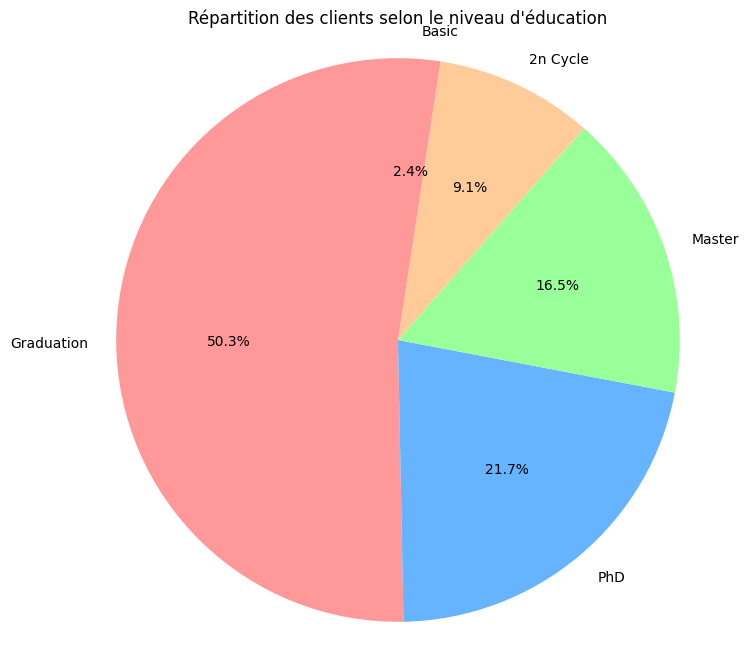

In [232]:
# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(education_count, labels=education_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Répartition des clients selon le niveau d'éducation")
plt.axis('equal')  # Assure que le graphique est un cercle
plt.show()



Statut matrimonial des clients

In [233]:
matrimonial_count = df["Marital_Status"].value_counts()
matrimonial_count

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

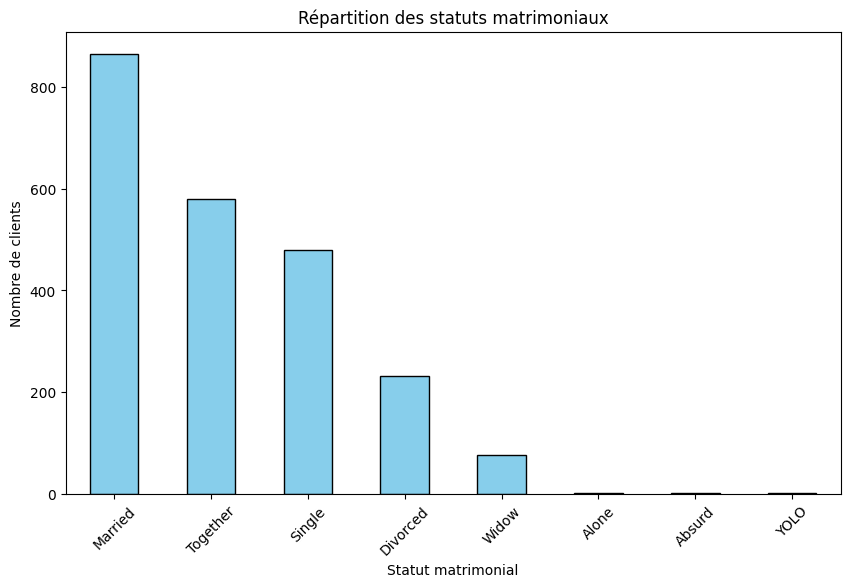

In [234]:
# Diagramme en barres
plt.figure(figsize=(10, 6))
matrimonial_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Répartition des statuts matrimoniaux")
plt.xlabel("Statut matrimonial")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.show()

In [235]:
# Répartition des clients selon l'année de naissance

df['Year_Birth'].value_counts()

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1977    52
1952    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1963    45
1982    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1981    39
1980    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1995     5
1993     5
1994     3
1996     2
1900     1
1893     1
1899     1
1941     1
1940     1
Name: count, dtype: int64

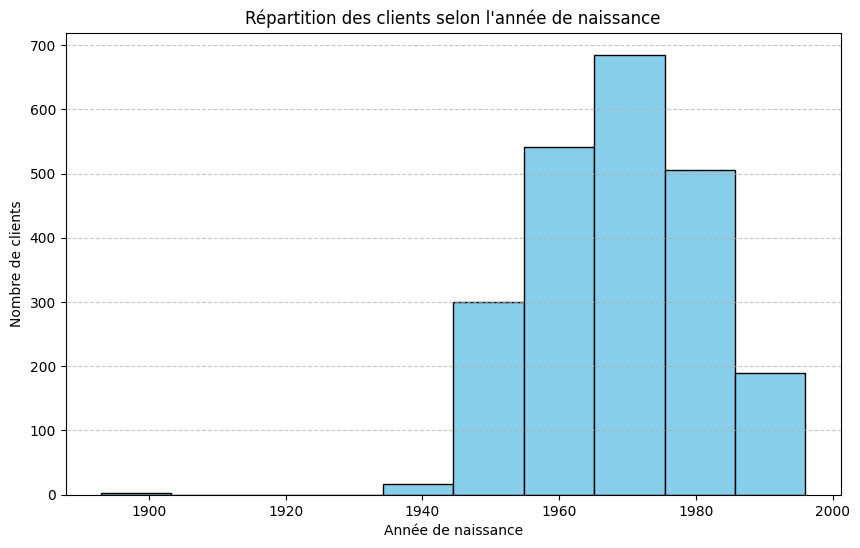

In [236]:
# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(df['Year_Birth'], bins=10, color='skyblue', edgecolor='black')
plt.title("Répartition des clients selon l'année de naissance")
plt.xlabel("Année de naissance")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Montants dépensés dans différentes catégories

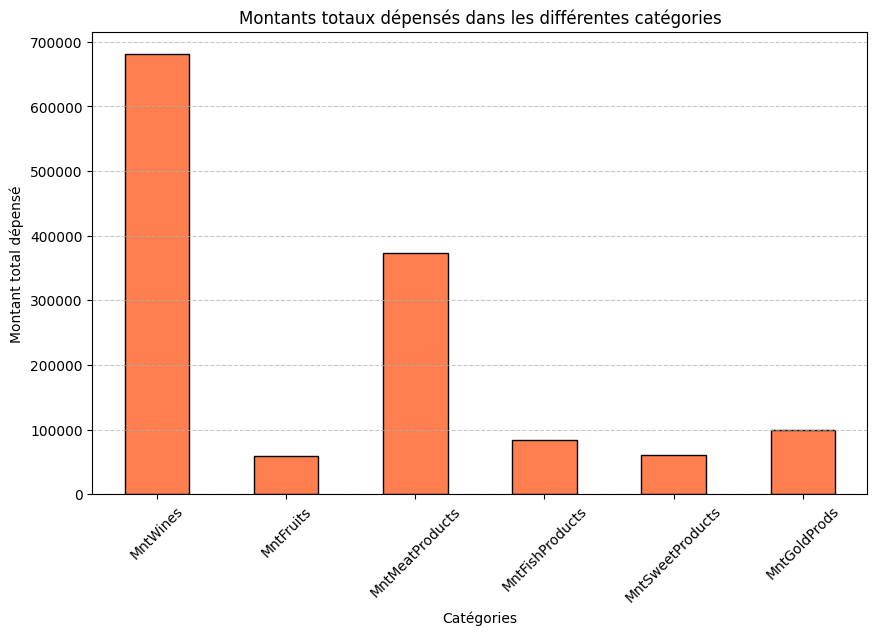

In [237]:

# Calcul des montants totaux pour chaque catégorie
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent = df[categories].sum()

# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
total_spent.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Montants totaux dépensés dans les différentes catégories")
plt.xlabel("Catégories")
plt.ylabel("Montant total dépensé")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Analyse par canal d'achat

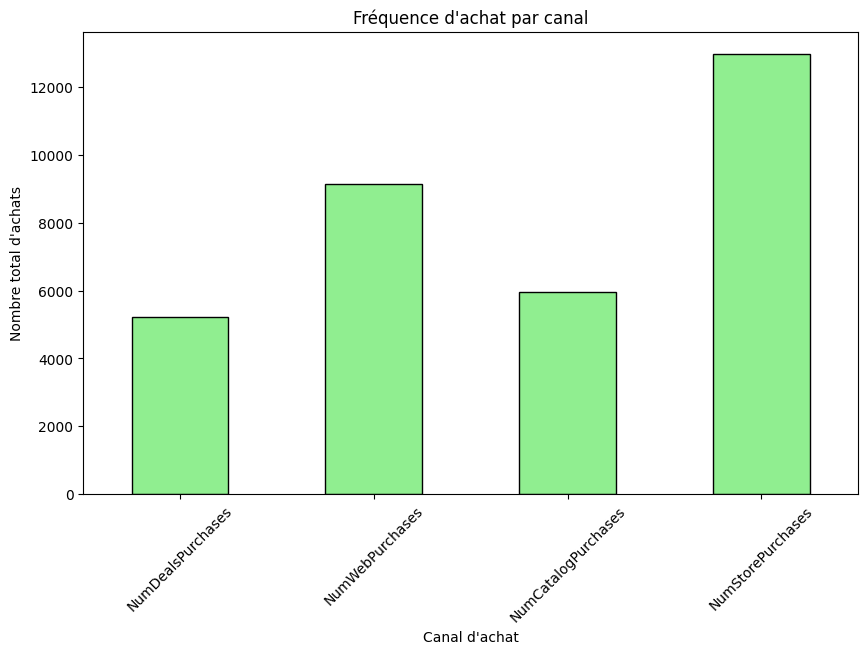

In [238]:
# Calculer le total pour chaque canal d'achat
channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
total_channels = df[channels].sum()

# Tracer un diagramme en barres
plt.figure(figsize=(10, 6))
total_channels.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Fréquence d'achat par canal")
plt.xlabel("Canal d'achat")
plt.ylabel("Nombre total d'achats")
plt.xticks(rotation=45)
plt.show()


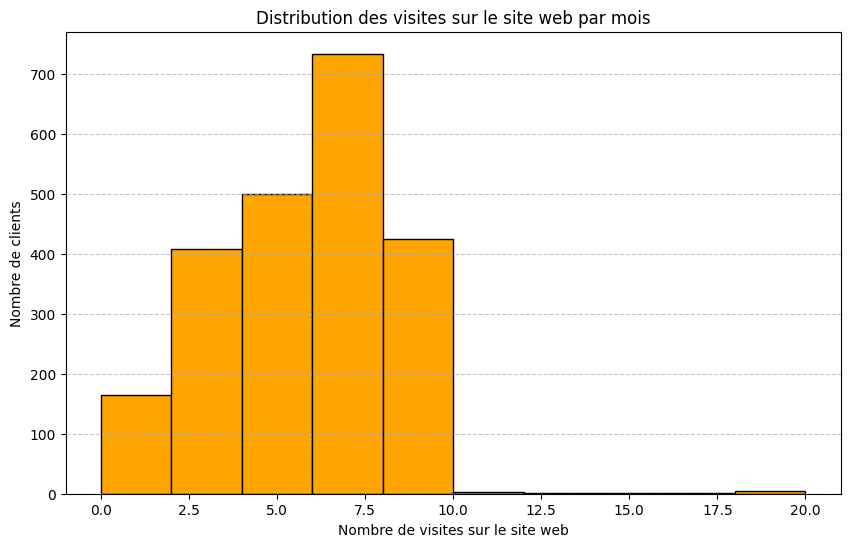

In [239]:
# Tracer un histogramme des visites sur le site web
plt.figure(figsize=(10, 6))
plt.hist(df['NumWebVisitsMonth'], bins=10, color='orange', edgecolor='black')
plt.title("Distribution des visites sur le site web par mois")
plt.xlabel("Nombre de visites sur le site web")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Analyse des campagnes marketing

Corrélation entre l'engagement dans les campagnes et les dépenses

In [240]:
# Calcul des dépenses totales
df['TotalSpent'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])


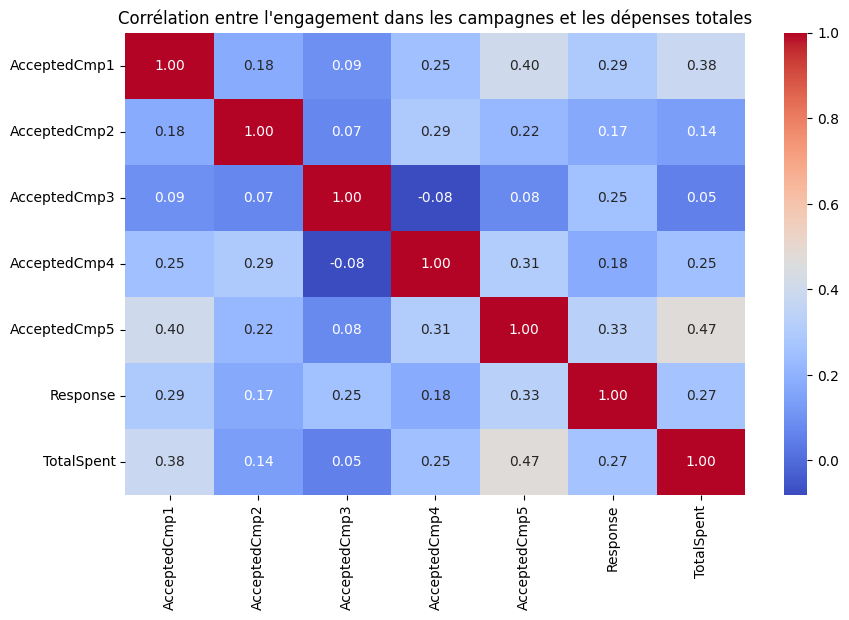

In [241]:
# Calcul des corrélations entre campagnes et dépenses totales
correlation = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalSpent']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corrélation entre l'engagement dans les campagnes et les dépenses totales")
plt.show()


Analyse des campagnes les plus efficaces

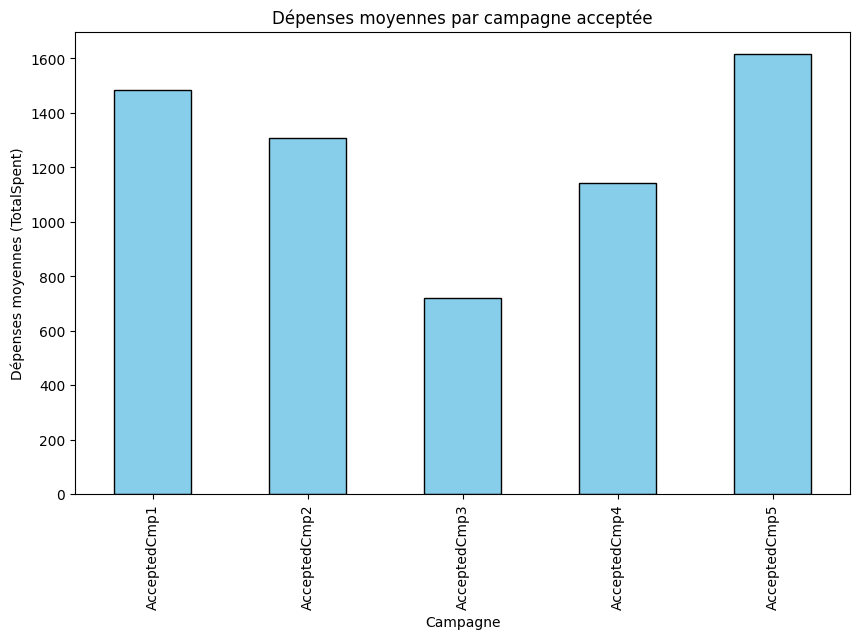

In [242]:
# Calcul des dépenses moyennes pour chaque campagne
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_effectiveness = {}

for campaign in campaigns:
    campaign_effectiveness[campaign] = df[df[campaign] == 1]['TotalSpent'].mean()

campaign_effectiveness_df = pd.DataFrame.from_dict(campaign_effectiveness, orient='index', columns=['Avg_Spending'])

# Diagramme en barres
plt.figure(figsize=(10, 6))
campaign_effectiveness_df['Avg_Spending'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Dépenses moyennes par campagne acceptée")
plt.xlabel("Campagne")
plt.ylabel("Dépenses moyennes (TotalSpent)")
plt.show()


Comparer le taux d'acceptation des campagnes

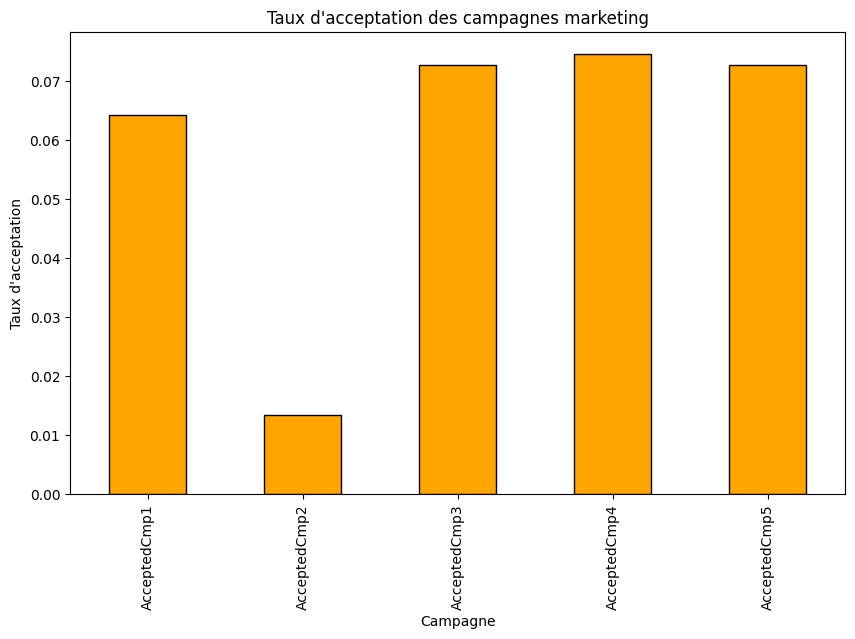

In [243]:
# Taux d'acceptation pour chaque campagne
campaign_acceptance = df[campaigns].mean()

# Diagramme en barres pour le taux d'acceptation
plt.figure(figsize=(10, 6))
campaign_acceptance.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Taux d'acceptation des campagnes marketing")
plt.xlabel("Campagne")
plt.ylabel("Taux d'acceptation")
plt.show()


### Analyse de la réactivité des clients

Analyse de la récence : indique le nombre de jours depuis la dernière interaction du client avec l'entreprise. Cela permet de mesurer l'engagement récent.

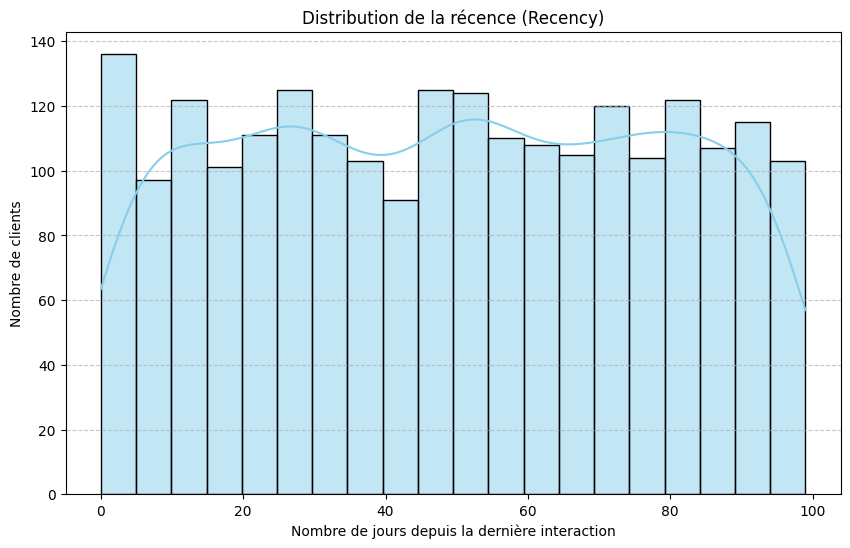

In [244]:
# Histogramme de la récence
plt.figure(figsize=(10, 6))
sns.histplot(df['Recency'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution de la récence (Recency)")
plt.xlabel("Nombre de jours depuis la dernière interaction")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Segmentation par revenu et dépenses

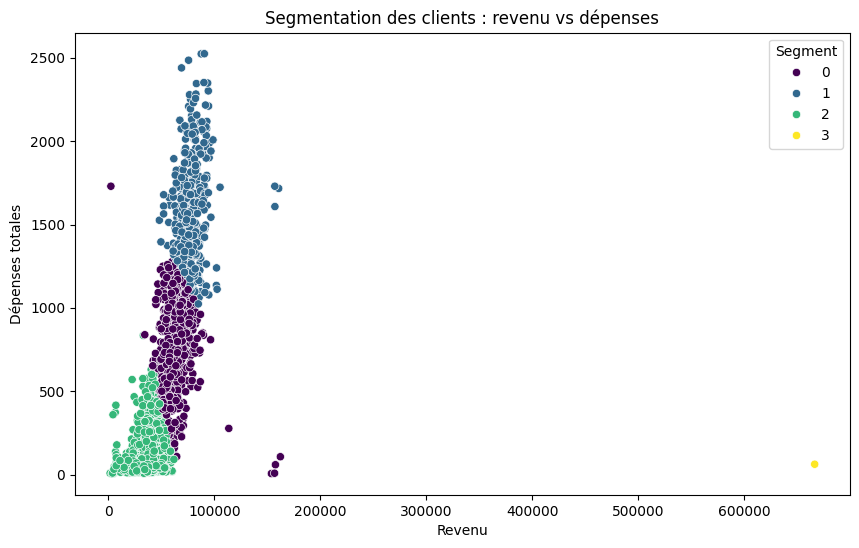

In [245]:
# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Income', 'TotalSpent']])

# Application de K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_data)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpent', hue='Segment', data=df, palette='viridis')
plt.title("Segmentation des clients : revenu vs dépenses")
plt.xlabel("Revenu")
plt.ylabel("Dépenses totales")
plt.legend(title="Segment")
plt.show()


Transformer les colonne de type objectif pour pouvoir faire la coralation et chosir les colonne important

In [246]:
# Initialiser le LabelEncoder
encoder = LabelEncoder()

# Encodage de la colonne 'Education'
df['Education_encoded'] = encoder.fit_transform(df['Education'])

# Affichage du DataFrame encodé
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Segment,Education_encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1617,1,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,27,2,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,53,2,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,422,0,4


In [247]:
# Initialiser le LabelEncoder
encoder = LabelEncoder()

# Encodage de la colonne 'Education'
df['Marital_Status_encoded'] = encoder.fit_transform(df['Marital_Status'])

# Affichage du DataFrame encodé
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Segment,Education_encoded,Marital_Status_encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,1617,1,2,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,27,2,2,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,776,0,2,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,53,2,2,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,422,0,4,3


In [248]:


# Exemple de conversion de la colonne en type datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')

# Vérification du type de la colonne après conversion
print(df['Dt_Customer'].dtype)


datetime64[ns]


In [249]:
# Supprimer les colonnes 'Marital_Status' et 'Education'
df = df.drop(['Marital_Status', 'Education'], axis=1)

In [250]:
df.dtypes

ID                                 int64
Year_Birth                         int64
Income                           float64
Kidhome                            int64
Teenhome                           int64
Dt_Customer               datetime64[ns]
Recency                            int64
MntWines                           int64
MntFruits                          int64
MntMeatProducts                    int64
MntFishProducts                    int64
MntSweetProducts                   int64
MntGoldProds                       int64
NumDealsPurchases                  int64
NumWebPurchases                    int64
NumCatalogPurchases                int64
NumStorePurchases                  int64
NumWebVisitsMonth                  int64
AcceptedCmp3                       int64
AcceptedCmp4                       int64
AcceptedCmp5                       int64
AcceptedCmp1                       int64
AcceptedCmp2                       int64
Complain                           int64
Z_CostContact   

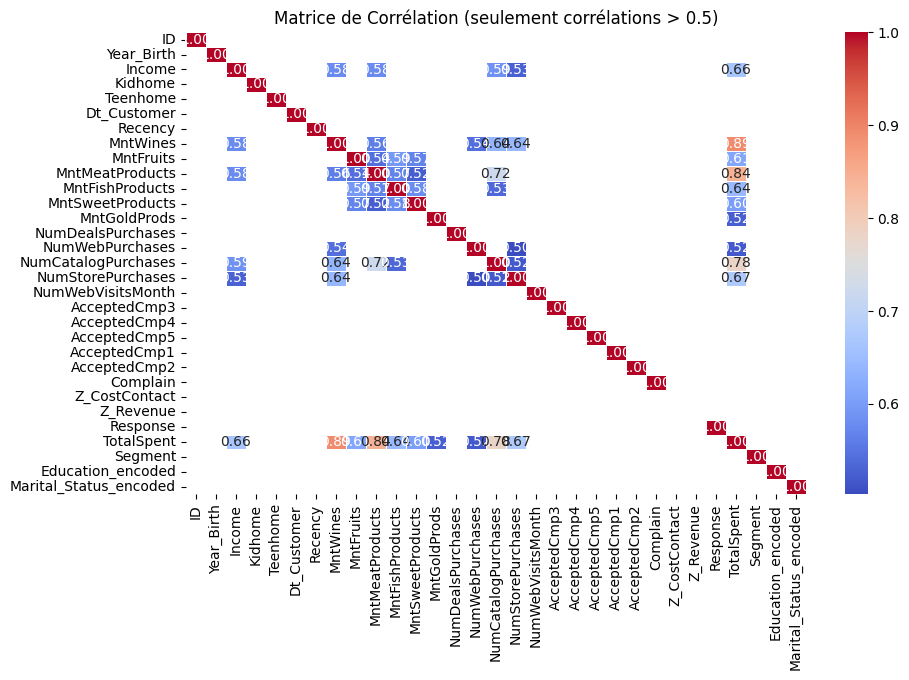

In [252]:
# Calculer la matrice de corrélation pour tout le DataFrame
correlation = df.corr()

# Filtrer pour ne montrer que les corrélations > 0.5 (par exemple)
correlation_filtered = correlation[correlation > 0.5]

# Tracer la heatmap filtrée
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_filtered, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation (seulement corrélations > 0.5)")
plt.show()
